In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [7]:
import h5py
def load_data():
    train_dataset = h5py.File('./trainset.hdf5',"r")
    X_train = np.array(train_dataset["X_train"][:])
    y_train = np.array(train_dataset["Y_train"][:])
    test_dataset = h5py.File("./testset.hdf5","r")
    X_test = np.array(test_dataset["X_test"][:])
    y_test = np.array(test_dataset["Y_test"][:])
    return X_train,X_test,y_train,y_test

In [10]:
X_train,X_test,y_train,y_test = load_data()
X_train

array([[[164, 174, 163, ..., 144, 131, 134],
        [162, 174, 182, ..., 143, 144, 128],
        [158, 169, 187, ..., 158, 143, 151],
        ...,
        [175, 168, 166, ...,  91, 176, 173],
        [167, 166, 166, ...,  45, 184, 124],
        [176, 172, 168, ...,  87, 180,  39]],

       [[ 42,  43,  39, ...,  47,  46,  42],
        [ 38,  44,  42, ...,  40,  47,  42],
        [ 45,  46,  36, ...,  43,  40,  38],
        ...,
        [ 87,  85,  70, ...,  75,  78,  82],
        [ 70,  70,  71, ...,  52,  67,  68],
        [ 64,  61,  60, ...,  55,  52,  55]],

       [[ 27,  26,  29, ...,  84,  82,  84],
        [ 29,  27,  28, ...,  89,  88,  89],
        [ 28,  32,  27, ...,  88,  90,  86],
        ...,
        [101,  92,  17, ..., 112, 119, 123],
        [173, 178, 175, ..., 141, 137, 138],
        [ 10,  11,  26, ..., 135, 141, 121]],

       ...,

       [[ 47,  68, 142, ...,  39,  35,  33],
        [ 55,  68, 159, ...,  54,  41,  44],
        [ 58,  75, 141, ...,  40,  58,  63

In [1452]:
# X,y = make_blobs(n_samples=200,n_features=2,centers=2)
# y = y.reshape(y.shape[0],1)
# m = X.shape[0]
# n = X.shape[1]


(200, 2)
(200, 1)


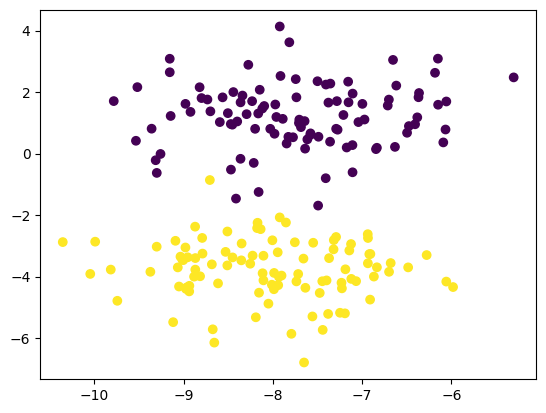

In [1453]:
print(X.shape)
print(y.shape)
plt.scatter(X[:,0],X[:,1],c=y)

In [1454]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [1455]:
def initialize(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [1456]:
def model(X,W,b):
    Z = np.dot(X,W) + b
    return sigmoid(Z)

In [1457]:
def log_loss(A,y):
    m = y.shape[0]
    return -1 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [1458]:
def gradients(X,A,y):
    m = X.shape[0]
    dW = 1/m * np.dot(X.T,A-y)
    db = 1/m * np.sum(A-y)
    return (dW,db)

In [1459]:
def update(W,b,dW,db,learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W,b)

In [1460]:
def predict(X,W,b):
    A = model(X,W,b)
    return A>=0.5

In [1461]:
from sklearn.metrics import accuracy_score

In [1462]:
def neuron(X,y,n_iter = 10000,learning_rate = 0.01):
    W,b = initialize(X)
    J = []
    for i in range(n_iter):
        A = model(X,W,b)
        Loss = log_loss(A,y)
        J.append(Loss)
        dW, db = gradients(X,A,y)
        W,b = update(W,b,dW,db,learning_rate=learning_rate)
    y_pred = predict(X,W,b)
    print("score: {}%\n".format(accuracy_score(y,y_pred)*100))
    plt.plot(J)
    return (W,b)

score: 99.0%

parameters:
W
[[ 0.52954301]
 [-2.87408063]]
b
[0.06658915]



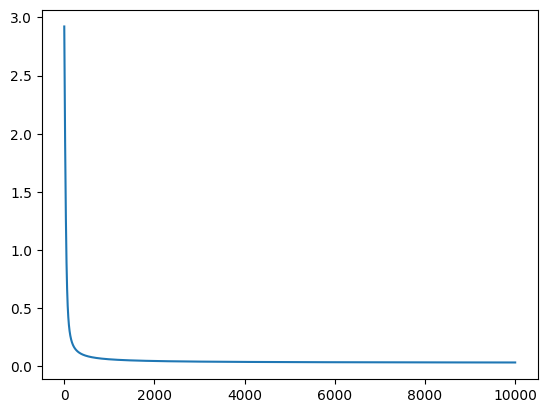

In [1463]:
W,b = neuron(X,y)
print("parameters:\nW\n{}\nb\n{}\n".format(W,b))

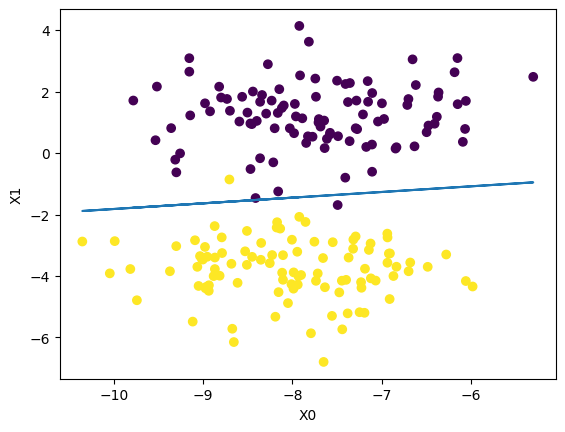

In [1464]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("X0")
plt.ylabel("X1")
# W0.X0 + W1.X1 + b = 0 => X1 = (-b - W0.X0) / W1
plt.plot(X[:,0],(-b - W[0] * X[:,0]) / W[1])